<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/crank_Nicholson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método implícito de Crank- Nicholson

In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap
from tabulate import tabulate #PAra hacer la tabla

In [2]:
def f(x): #Funcion
    return 1-4*(x-1/2)**2

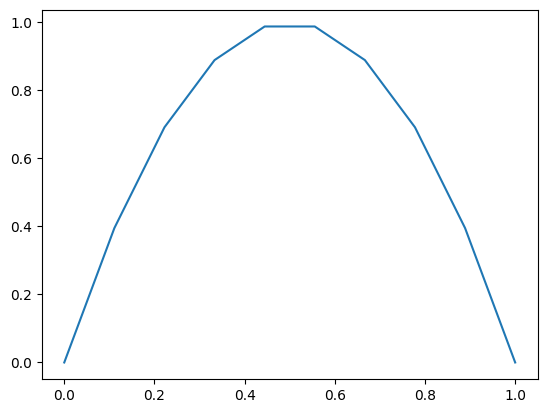

In [3]:
#Gráfica de la funci+ón
x = np.linspace(0,1,10)
plt.plot(x,f(x))

In [4]:
def matriz_A(n): #Matriz tridiagonal hecha en numpy
    A = np.zeros((n, n))
    r=1
    for i in range(n):
        A[i, i] = 2+2*r
        if i > 0:
            A[i, i-1] = -r
        if i < n-1:
            A[i, i+1] = -r
    return sp.Matrix(A)

n = 9  # número de nodos internos
A = matriz_A(n)
print("Matriz A creada:")
print(A)

Matriz A creada:
Matrix([[4.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-1.00000000000000, 4.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.00000000000000, 4.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.00000000000000, 4.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -1.00000000000000, 4.00000000000000, -1.00000000000000, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, -1.00000000000000, 4.00000000000000, -1.00000000000000, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -1.00000000000000, 4.00000000000000, -1.00000000000000, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.00000000000000, 4.00000000000000, -1.00000000000000], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.00000000000000, 4.00000000000000]])


In [5]:
A

Matrix([
[ 4.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-1.0,  4.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  4.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  4.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  4.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  4.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  4.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  4.0, -1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  4.0]])

Aqui solo estoy agregando otra forma de hacer la matriz, pero es lo mismo que con numpy

In [6]:
#Opción con simpy para Matriz tridiagonal
def tridiagonal(n,a,b):
  return sp.Matrix([
      [a if i==j
      else
      b if abs(i-j) == 1
      else
      0 for j in range(n)]
      for i in range(n)
  ])

In [7]:
r= 1
A = tridiagonal(9, 2+2*r,-r)

In [8]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [9]:
def matriz_B(n):
    B = np.zeros((n, n))
    r=1
    for i in range(n):
        B[i, i] = 2-2*r
        if i > 0:
            B[i, i-1] = r
        if i < n-1:
            B[i, i+1] = r
    return sp.Matrix(B)

n = 9  # número de nodos internos
B = matriz_B(n)
print("Matriz A creada:")
print(B)

Matriz A creada:
Matrix([[0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0, 1.00000000000000], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 0.0]])


In [10]:
#Matriz B hecha con simpy
b = sp.Matrix([f(0.1*(i+1)) for i in range(n)])


In [11]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [12]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [13]:
A.LUsolve(b)

Matrix([
[0.165359116022099],
[0.301436464088398],
[0.400386740331492],
[0.460110497237569],
[0.480055248618785],
[0.460110497237569],
[0.400386740331492],
[0.301436464088398],
[0.165359116022099]])

Solución del problema

In [14]:
#Método de cracnk visto en clase
def Crank(A, B, b, j):
    S = []
    b_1 = B*b

    for i in range(j):
        sol = A.LUsolve(b_1)
        S.append(sol.T)
        b_1 = B*sol

    return sp.Matrix(S)   # matriz resultado

In [15]:
j = 50

In [16]:
U=Crank(A, B, b, j)

Tabla de valores:
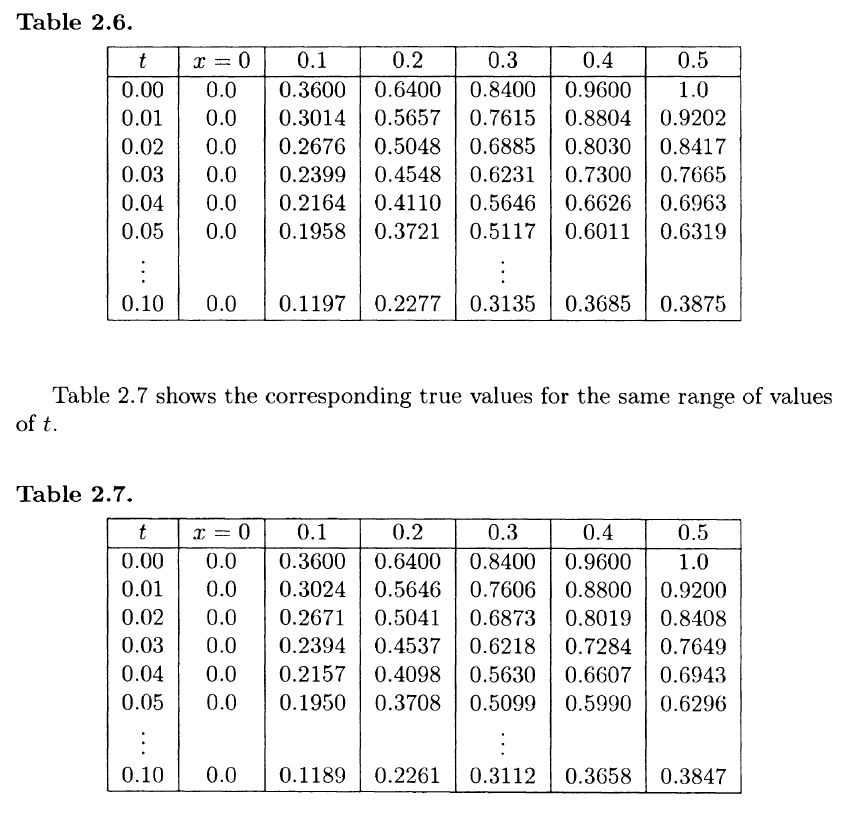

In [17]:
Tabla = [list(U.row(i)) for i in range(5)]
print(tabulate(Tabla , tablefmt="grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

In [18]:
U_np= np.array(U.tolist(), dtype=float)

In [19]:
# Datos reales (de la tabla 2.7)
datos = {
    0.00: [0.3600, 0.6400, 0.8400, 0.9600, 1.0],
    0.01: [0.3024, 0.5646, 0.7606, 0.8800, 0.9200],
    0.02: [0.2671, 0.5041, 0.6873, 0.8019, 0.8408],
    0.03: [0.2394, 0.4537, 0.6218, 0.7284, 0.7649],
    0.04: [0.2157, 0.4098, 0.5630, 0.6607, 0.6943],
    0.05: [0.1950, 0.3708, 0.5099, 0.5990, 0.6296],
    0.10: [0.1189, 0.2261, 0.3112, 0.3658, 0.3847]
}



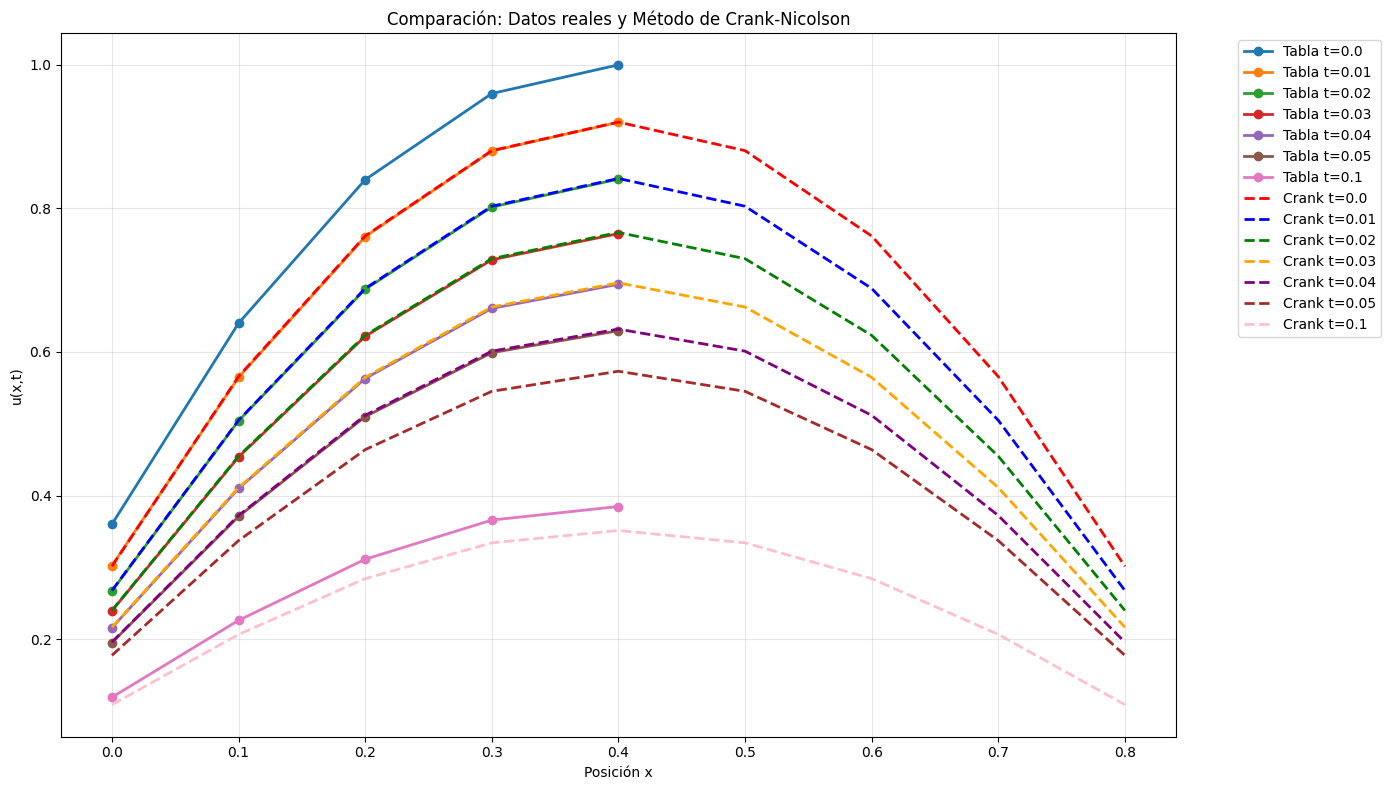

In [52]:
#GRÁFICA
plt.figure(figsize=(14, 8))

# Posiciones para los datos de la tabla (solo 5 puntos)
posiciones_tabla = [[0.1*i] for i in range(0,5)]  # x1, x2, x3, x4, x5

# Posiciones para el método de Crank (9 puntos)
posiciones_crank = [[0.1*i] for i in range(0,9)]

# Graficar datos de la tabla
for tiempo, valores in datos.items():
    plt.plot(posiciones_tabla, valores, 'o-', linewidth=2, markersize=6,
             label=f'Tabla t={tiempo}')

# Graficar método de Crank
tiempos_crank = [0, 1, 2, 3, 4, 5, 10]  # Iteraciones equivalentes a los tiempos de la tabla
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

for idx, t_idx in enumerate(tiempos_crank):
    if t_idx < U_np.shape[0]:  # Verificar que el índice existe
        plt.plot(posiciones_crank, U_np[t_idx, :], '--', linewidth=2,
                 color=colores[idx], label=f'Crank t={list(datos.keys())[idx]}')

plt.xlabel('Posición x')
plt.ylabel('u(x,t)')
plt.title('Comparación: Datos reales y Método de Crank-Nicolson')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()